In [50]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
with open("FantasyVsOliver-1653263235612.json") as f:
    jsondata= json.load(f)

In [18]:
for i in jsondata:
    print(i)

league
league_entries
matches
standings


In [57]:
names = {447012:"Tull",451827:"Oliver"}

In [30]:
MATCHES = pd.DataFrame(jsondata["matches"])
MATCHES.head()

,event,finished,league_entry_1,league_entry_1_points,league_entry_2,league_entry_2_points,started,winning_league_entry,winning_method
0,1,True,451827,59,447012,36,True,None,None
1,2,True,451827,34,447012,28,True,None,None
2,3,True,451827,42,447012,30,True,None,None
3,4,True,451827,60,447012,44,True,None,None
4,5,True,451827,27,447012,46,True,None,None


In [92]:
n=2
Cumulative_score = dict()
for i in range(n):
    name = MATCHES["league_entry_"+str(i+1)][0]
    scores = MATCHES["league_entry_"+str(i+1)+"_points"]
    Cumulative_score[name] = scores.cumsum().values

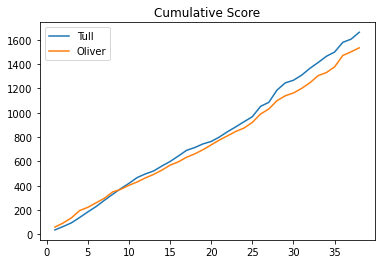

In [96]:
fig,ax = plt.subplots()
plt.title("Cumulative Score")
for name in names:
    sns.lineplot(x = [i for i in range(1,39)],
                 y = Cumulative_score[name], label = names[name]) 

In [89]:
Cumulative_points = dict()
name_1 = MATCHES["league_entry_1"][0]
scores_1 = MATCHES["league_entry_1_points"]
name_2 = MATCHES["league_entry_2"][0]
scores_2 = MATCHES["league_entry_2_points"]
points_1 = [3 if scores_1[i] > scores_2[i] else 1 if scores_1[i] == scores_2[i] else 0 for i in range(38)]
points_2 = [3 if scores_2[i] > scores_1[i] else 1 if scores_2[i] == scores_1[i] else 0 for i in range(38)]
Cumulative_points[name_1] = pd.Series(points_1).cumsum().values
Cumulative_points[name_2] = pd.Series(points_2).cumsum().values

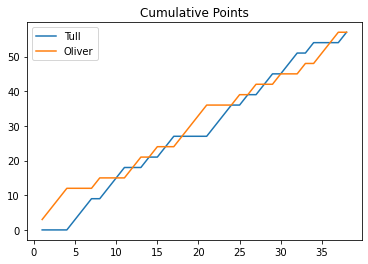

In [95]:
fig,ax = plt.subplots()
plt.title("Cumulative Points")
for name in names:
    sns.lineplot(x = [i for i in range(1,39)],
                 y = Cumulative_points[name], label = names[name]) 